### Python for algorithmic trading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
import random
import time
from math import exp, sqrt
%matplotlib inline

In [2]:
print(random.gauss(0,1))

0.22595947479706474


In [3]:
%%time

# Campana de Gauss

datos = []
for _ in tqdm_notebook(range(100000), desc="Avance: "):
    gauss = random.gauss(0,1)
    datos.append(gauss)
    
hist, bins = np.histogram(datos)


Avance:   0%|          | 0/100000 [00:00<?, ?it/s]

CPU times: total: 234 ms
Wall time: 244 ms


In [4]:
bins

array([-4.80684571, -3.87440595, -2.94196619, -2.00952643, -1.07708667,
       -0.14464692,  0.78779284,  1.7202326 ,  2.65267236,  3.58511212,
        4.51755188])

CPU times: total: 562 ms
Wall time: 585 ms


(0.0, 2420.0)

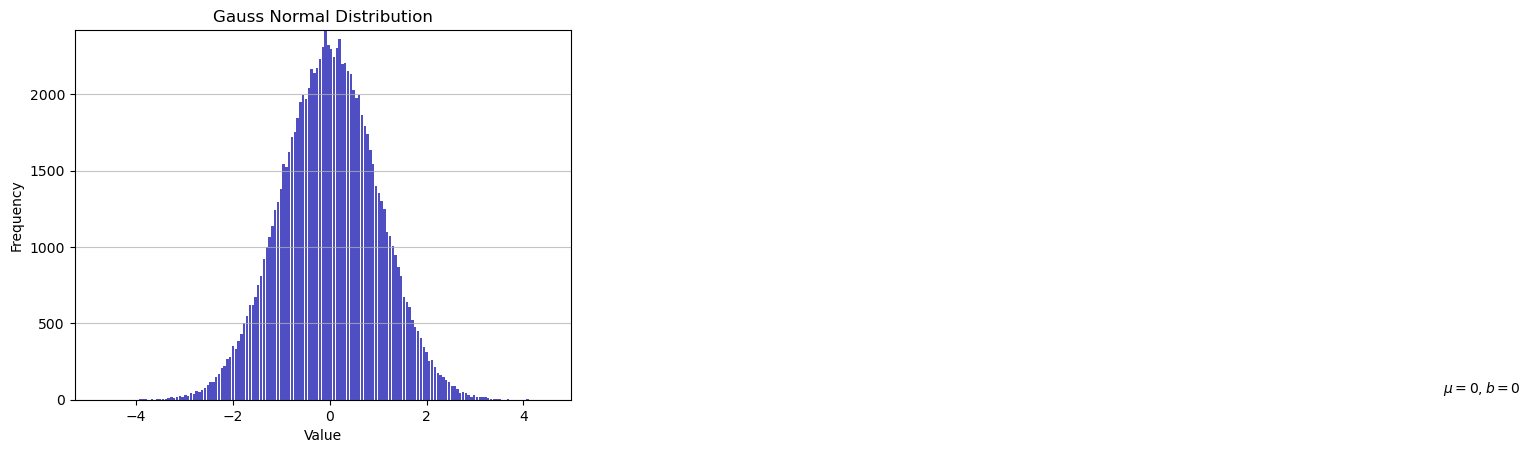

In [5]:
%%time

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=datos, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gauss Normal Distribution')
plt.text(23, 45, r'$\mu=0, b=0$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### LaTex markup language

$
S_T = S_0 \exp((r - 0.5 \sigma^2) T + \sigma z \sqrt{T})
$

In [6]:
%%time

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in tqdm_notebook(range(1000000), desc="Avance: "):
    ST = S0 * exp((r -0.5 * sigma**2) * T +
                 sigma * random.gauss(0,1) * sqrt(T))
    values.append(ST)


Avance:   0%|          | 0/1000000 [00:00<?, ?it/s]

CPU times: total: 3.2 s
Wall time: 3.28 s


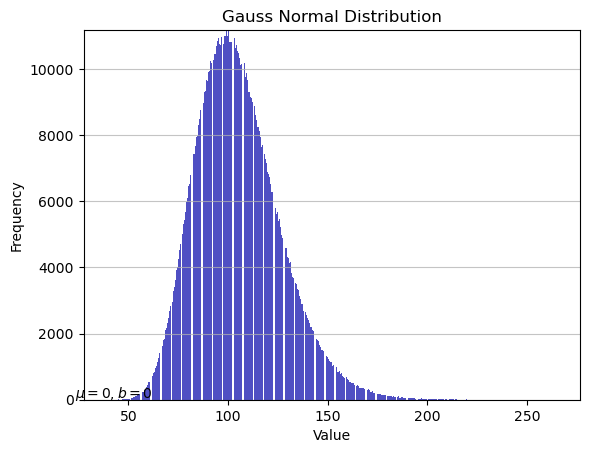

CPU times: total: 6.38 s
Wall time: 6.49 s


In [7]:
%%time

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gauss Normal Distribution')
plt.text(23, 45, r'$\mu=0, b=0$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [8]:
%%time

# Using numpy to avoid looping on the Python level

import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2
iterations = 1000000

values = []

ST = S0 * np.exp((r -0.5 * sigma**2) * T +
             sigma * np.random.standard_normal(iterations) * np.sqrt(T))



CPU times: total: 62.5 ms
Wall time: 59.1 ms


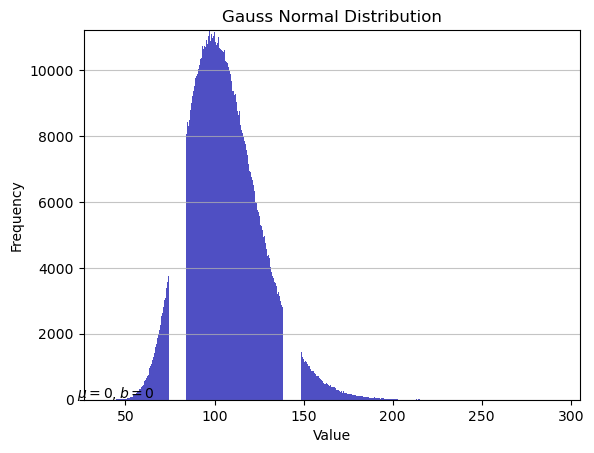

CPU times: total: 1.28 s
Wall time: 1.29 s


In [9]:
%%time

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=ST, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gauss Normal Distribution')
plt.text(23, 45, r'$\mu=0, b=0$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [10]:
ST[:100]

array([105.81603377, 114.0227194 , 126.19145275,  69.32277393,
       107.00231428, 152.72668682, 114.70009859, 105.50300688,
        93.38502428, 139.19038764, 116.31040413,  94.6239492 ,
        77.51789382, 107.74877366,  96.60613131, 116.89479455,
       102.24394726, 103.70272462,  96.31995731, 110.53505374,
        87.31696188, 113.79238751,  73.52795068, 118.17549479,
       130.28868566,  88.49583947, 116.09363029, 169.6258685 ,
       120.27516245,  79.05265117, 109.84392792, 123.74700596,
       111.8077836 , 126.76346166, 102.74461379, 145.44191565,
        88.51614125, 107.48052627, 101.62879998,  92.78643879,
        84.43282307,  79.51712588,  85.11408261, 111.50911862,
       116.24696843, 121.18441057,  93.16878527, 126.23850509,
       114.82262572, 122.39191801, 124.2420842 , 126.6577774 ,
       105.86608025, 126.47293131, 123.68768525, 118.74641376,
       121.12510922,  88.36625608, 130.74536515, 135.7546667 ,
       115.02266233, 127.78744447,  93.27564081, 106.12

In [11]:
values[:10]

[]

In [12]:
type(values)

list

In [13]:
type(ST)

numpy.ndarray

In [14]:
df = pd.DataFrame()

In [15]:
%%time


df['simulations'] = tqdm_notebook(S0 * np.exp((r -0.5 * sigma**2) * T +
             sigma * np.random.standard_normal(1000000) * np.sqrt(T)), desc= "Avance: ")

df['simulations']

Avance:   0%|          | 0/1000000 [00:00<?, ?it/s]

CPU times: total: 1.17 s
Wall time: 1.25 s


0          94.174561
1          82.548928
2          99.788724
3         176.351129
4          59.753526
             ...    
999995     67.243977
999996    117.213531
999997    107.475373
999998    105.971770
999999    109.387825
Name: simulations, Length: 1000000, dtype: float64

In [16]:
df.head(10)

,simulations
0,94.174561
1,82.548928
2,99.788724
3,176.351129
4,59.753526
5,75.476558
6,92.089730
7,89.261929
8,107.716646
9,103.954459


In [17]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [18]:
import configparser
c = configparser.ConfigParser()
c.read('../pyalgo.cfg')

[]

In [19]:
#!pip install Quandl

In [20]:
"""
import quandl as q
q.ApiConfig.api_key = c['quandl']['api_key']
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate',
                        figsize=(10, 6));
# plt.savefig('../../images/ch01/bitcoin_xr.png')

"""

"\nimport quandl as q\nq.ApiConfig.api_key = c['quandl']['api_key']\nd = q.get('BCHAIN/MKPRU')\nd['SMA'] = d['Value'].rolling(100).mean()\nd.loc['2013-1-1':].plot(title='BTC/USD exchange rate',\n                        figsize=(10, 6));\n# plt.savefig('../../images/ch01/bitcoin_xr.png')\n\n"

In [21]:
#!pip install yfinance
import yfinance as yf

nemo = yf.Ticker("BTC-USD")

# get historical market data
df = nemo.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-11-02,20482.958984,20742.810547,20087.134766,20159.503906,55552169483,0,0
2022-11-03,20162.689453,20382.095703,20086.240234,20209.988281,43228750179,0,0
2022-11-04,20208.769531,21209.560547,20188.019531,21147.230469,64072727950,0,0


In [22]:
df = df[['Close']]
df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-11-02,20159.503906
2022-11-03,20209.988281
2022-11-04,21147.230469


In [23]:
df['SMA'] = df['Close'].rolling(100).mean() # SMA = Simple Movil Average
df

C:\Users\araygada\AppData\Local\Temp\ipykernel_33712\309884661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['Close'].rolling(100).mean() # SMA = Simple Movil Average


,Close,SMA
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2022-11-02,20159.503906,20761.206309
2022-11-03,20209.988281,20750.908652
2022-11-04,21147.230469,20733.075469


C:\Users\araygada\AppData\Local\Temp\ipykernel_33712\4184568837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['Close'].rolling(100).mean()


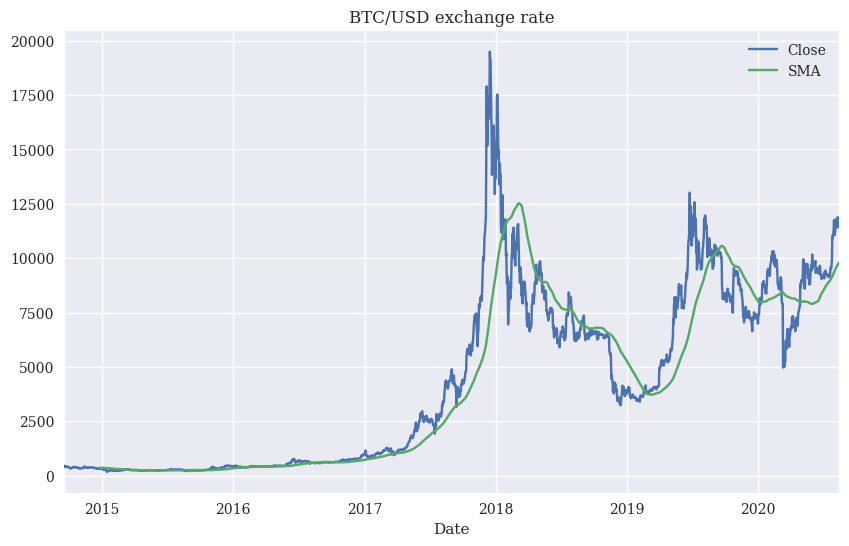

In [24]:

df['SMA'] = df['Close'].rolling(100).mean()
df.loc['2013-1-1':'2020-8-15'].plot(title='BTC/USD exchange rate',
                        figsize=(10, 6));

plt.savefig('BTC_USD.jpg')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(100)

a = np.random.standard_normal((5,3))

df = pd.DataFrame(a, columns=['a','b','c'])

df

,a,b,c
0,-1.749765,0.342680,1.153036
1,-0.252436,0.981321,0.514219
2,0.221180,-1.070043,-0.189496
3,0.255001,-0.458027,0.435163
4,-0.583595,0.816847,0.672721


<AxesSubplot:title={'center':'Random sample'}>

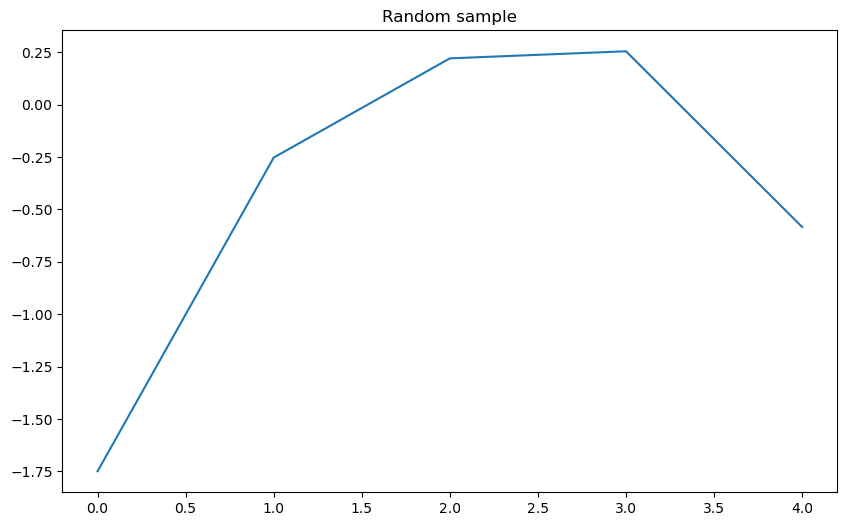

In [7]:
df['a'].plot(title='Random sample',
                        figsize=(10, 6))

<AxesSubplot:>

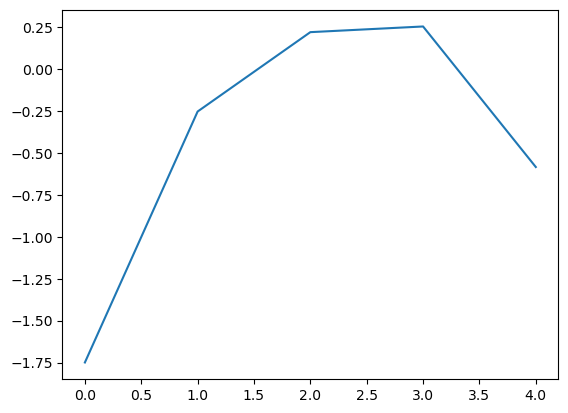

In [8]:
df['a'].plot()

In [13]:
# Password hash code-generating function

from notebook.auth import passwd

passwd('jupyter')

'argon2:$argon2id$v=19$m=10240,t=10,p=8$q2jAaz9LxfaE4nhX6rNmmA$v1oUjIxWFSfy3uhGEwRtDRVwhE5jx9SLtHT2gw1fyTk'

In [1]:
import configparser

In [10]:
config = configparser.ConfigParser()
config.read('pyalgo.cfg')

['pyalgo.cfg']

In [11]:
import quandl as q

In [28]:
data = q.get('BCHAIN/MKPRU', api_key=config['quandl']['api_key'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5060 entries, 2009-01-02 to 2022-11-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   5060 non-null   float64
dtypes: float64(1)
memory usage: 79.1 KB


In [29]:
data.head()

,Value
Date,
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0


In [30]:
data.tail()

,Value
Date,
2022-11-05,21152.93
2022-11-06,21292.67
2022-11-07,20920.33
2022-11-08,20598.44
2022-11-09,18540.11


In [31]:
data['Value'].resample('A').last()

Date
2009-12-31        0.000000
2010-12-31        0.299998
2011-12-31        4.470000
2012-12-31       13.570000
2013-12-31      746.900000
2014-12-31      315.700000
2015-12-31      428.230000
2016-12-31      958.120000
2017-12-31    14165.575000
2018-12-31     3791.545833
2019-12-31     7219.600000
2020-12-31    28856.590000
2021-12-31    47132.960000
2022-12-31    18540.110000
Freq: A-DEC, Name: Value, dtype: float64

In [45]:
data1 = q.get('BITFINEX/XVGBTC', api_key=config['quandl']['api_key'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815 entries, 2018-07-05 to 2020-10-22
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    815 non-null    float64
 1   Low     815 non-null    float64
 2   Mid     815 non-null    float64
 3   Last    815 non-null    float64
 4   Bid     815 non-null    float64
 5   Ask     815 non-null    float64
 6   Volume  815 non-null    float64
dtypes: float64(7)
memory usage: 50.9 KB


In [33]:
!pip install Nasdaq-Data-Link

In [62]:
import nasdaqdatalink

In [63]:
nasdaqdatalink.ApiConfig.api_key = config['quandl']['api_key'] #"YOUR_KEY_HERE"
mydata = nasdaqdatalink.get("FRED/GDP")
mydata.tail()

,Value
Date,
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959
2021-07-01,23202.344
2021-10-01,23992.355


In [64]:
mydata = nasdaqdatalink.get("NSE/OIL")
mydata.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,178.10,179.00,174.35,175.00,174.80,761462.0,1343.75
2019-01-01,175.00,176.40,174.15,175.15,175.75,381570.0,669.16
2019-01-02,175.80,176.20,171.00,172.35,172.40,722532.0,1251.85
2019-01-03,172.80,175.70,171.50,172.00,172.00,698190.0,1212.34
2019-01-04,172.05,174.95,172.05,174.55,174.55,431122.0,749.99


In [57]:
# Zach Fundamental Collection A https://data.nasdaq.com/tables/ZFA/ZACKS-FC

import nasdaqdatalink

data = nasdaqdatalink.get_table('ZACKS/FC', ticker='MCD') # ticker='AAPL'
data.tail()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,MCD,MCD,McDonald's,McDonald's Corporation,NYSE,USD,2018-12-31,Q,None,2018,...,25.4,1511.6,-849.2001,-892.5000,None,-892.5000,778.2,785.6,1.83,1.82
1,MCD,MCD,McDonald's,McDonald's Corporation,NYSE,USD,2018-09-30,Q,None,2018,...,36.0,2471.1,-692.5000,-779.7999,None,-779.7999,772.8,779.6,2.12,2.10
2,MCD,MCD,McDonald's,McDonald's Corporation,NYSE,USD,2018-06-30,Q,None,2018,...,23.9,1338.8,-558.5000,-786.1000,None,-786.1000,780.0,787.1,1.92,1.90
3,MCD,MCD,McDonald's,McDonald's Corporation,NYSE,USD,2018-03-31,Q,None,2018,...,39.8,1645.2,-481.1000,-797.5000,None,-797.5000,790.9,798.7,1.74,1.72
4,MCD,MCD,McDonald's,McDonald's Corporation,NYSE,USD,2018-12-31,A,None,2018,...,NaN,NaN,NaN,NaN,None,NaN,778.2,785.6,7.61,7.54


In [58]:
import matplotlib.pyplot as plt

mydata = nasdaqdatalink.get("NSE/OIL")
mydata.tail()



,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,178.10,179.00,174.35,175.00,174.80,761462.0,1343.75
2019-01-01,175.00,176.40,174.15,175.15,175.75,381570.0,669.16
2019-01-02,175.80,176.20,171.00,172.35,172.40,722532.0,1251.85
2019-01-03,172.80,175.70,171.50,172.00,172.00,698190.0,1212.34
2019-01-04,172.05,174.95,172.05,174.55,174.55,431122.0,749.99


In [59]:
mydata['Close']

Date
2009-09-30    1141.20
2009-10-01    1166.35
2009-10-05    1140.55
2009-10-06    1144.90
2009-10-07    1141.60
               ...   
2018-12-31     174.80
2019-01-01     175.75
2019-01-02     172.40
2019-01-03     172.00
2019-01-04     174.55
Name: Close, Length: 2299, dtype: float64

<AxesSubplot:xlabel='Date'>

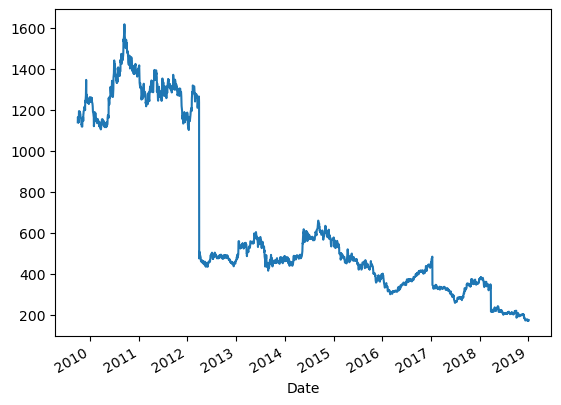

In [60]:
mydata['Close'].plot()

In [65]:
#!pip install yahoo-finance

import yfinance as yf

<IPython.core.display.Javascript object>


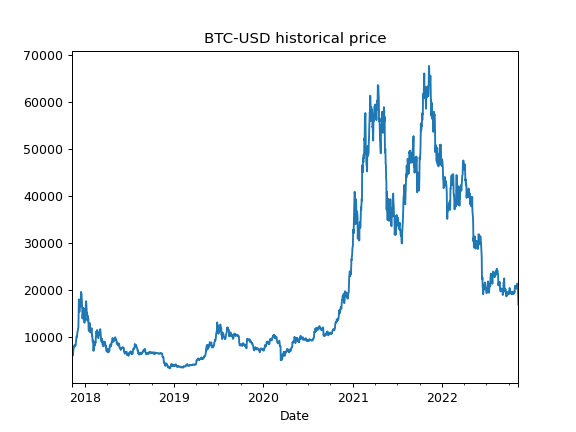

<AxesSubplot:title={'center':'BTC-USD historical price'}, xlabel='Date'>

In [106]:
%matplotlib notebook
import re

ticker = yf.Ticker('BTC-USD')

name = re.search("(?<=\<).+?(?=\>)", str(ticker))
name = name.group(0)
name

df = ticker.history(period='5y')
df['Close'].plot(title=f'{name} historical price')

In [107]:
data = q.get('BCHAIN/MKPRU', api_key=config['quandl']['api_key'])

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5060 entries, 2009-01-02 to 2022-11-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   5060 non-null   float64
dtypes: float64(1)
memory usage: 79.1 KB


In [109]:
data.tail()

,Value
Date,
2022-11-05,21152.93
2022-11-06,21292.67
2022-11-07,20920.33
2022-11-08,20598.44
2022-11-09,18540.11


In [111]:
data['Value'].resample('A').last()

Date
2009-12-31        0.000000
2010-12-31        0.299998
2011-12-31        4.470000
2012-12-31       13.570000
2013-12-31      746.900000
2014-12-31      315.700000
2015-12-31      428.230000
2016-12-31      958.120000
2017-12-31    14165.575000
2018-12-31     3791.545833
2019-12-31     7219.600000
2020-12-31    28856.590000
2021-12-31    47132.960000
2022-12-31    18540.110000
Freq: A-DEC, Name: Value, dtype: float64

In [ ]:
import quandl as q

In [116]:
data = q.get('FSE/SAP_X',
             start_date='2018-1-1',
             end_date='2022-1-1',
            api_key=config['quandl']['api_key'])

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-02 to 2020-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   408 non-null    float64
 1   High                   730 non-null    float64
 2   Low                    730 non-null    float64
 3   Close                  730 non-null    float64
 4   Change                 0 non-null      object 
 5   Traded Volume          684 non-null    float64
 6   Turnover               684 non-null    float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         0 non-null      object 
dtypes: float64(6), object(4)
memory usage: 62.7+ KB


In [117]:
data.tail()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2020-11-25,97.70,99.20,97.50,99.04,None,14786.0,1451599.95,None,None,None
2020-11-26,99.20,100.52,98.81,99.74,None,15074.0,1505214.48,None,None,None
2020-11-27,99.81,100.74,99.60,100.10,None,10634.0,1066602.61,None,None,None
2020-11-30,99.90,101.74,99.90,101.70,None,12624.0,1273371.98,None,None,None
2020-12-01,102.90,102.90,101.76,101.90,None,15426.0,1577983.62,None,None,None


In [119]:
# Permanent configuration of the api_key

q.ApiConfig.api_key = config['quandl']['api_key']

In [123]:
# Getting volatiles from Microsoft Inc.

vol = q.get('VOL/MSFT')
vol[:5]

,Hv10,Hv20,Hv30,Hv60,Hv90,Hv120,Hv150,Hv180,Phv10,Phv20,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.1341,0.2541,0.2283,0.1905,0.2191,0.2052,0.1900,0.1869,0.1470,0.1811,...,0.2158,0.0201,0.2339,0.2215,0.2277,0.0159,0.2353,0.2220,0.2287,0.0157
2015-01-05,0.0978,0.2563,0.2289,0.1917,0.2200,0.2044,0.1902,0.1874,0.1432,0.1738,...,0.2224,0.0248,0.2398,0.2222,0.2310,0.0175,0.2410,0.2224,0.2317,0.0170
2015-01-06,0.1097,0.2622,0.2238,0.1941,0.2206,0.2049,0.1910,0.1888,0.1664,0.1761,...,0.2256,0.0239,0.2412,0.2259,0.2336,0.0176,0.2419,0.2264,0.2341,0.0171
2015-01-07,0.1644,0.2253,0.2294,0.1916,0.2152,0.2058,0.1919,0.1891,0.1775,0.1713,...,0.2244,0.0214,0.2402,0.2282,0.2342,0.0173,0.2413,0.2284,0.2348,0.0171
2015-01-08,0.2574,0.2500,0.2482,0.2057,0.2191,0.2120,0.1968,0.1933,0.1901,0.1703,...,0.2175,0.0189,0.2357,0.2234,0.2295,0.0199,0.2369,0.2237,0.2303,0.0200


In [127]:
vol.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hv10    1006 non-null   float64
 1   Hv20    1006 non-null   float64
 2   Hv30    1006 non-null   float64
 3   Hv60    1006 non-null   float64
 4   Hv90    1006 non-null   float64
 5   Hv120   1006 non-null   float64
 6   Hv150   1006 non-null   float64
 7   Hv180   1006 non-null   float64
 8   Phv10   1006 non-null   float64
 9   Phv20   1006 non-null   float64
dtypes: float64(10)
memory usage: 86.5 KB


In [129]:
vol[['IvMean30','IvMean60','IvMean90']].tail()

,IvMean30,IvMean60,IvMean90
Date,,,
2018-12-24,0.4310,0.4112,0.3829
2018-12-26,0.4059,0.3844,0.3587
2018-12-27,0.3918,0.3879,0.3618
2018-12-28,0.3940,0.3736,0.3482
2018-12-31,0.3760,0.3519,0.3310


In [133]:
vol.iloc[:, 0:5]

,Hv10,Hv20,Hv30,Hv60,Hv90
Date,,,,,
2015-01-02,0.1341,0.2541,0.2283,0.1905,0.2191
2015-01-05,0.0978,0.2563,0.2289,0.1917,0.2200
2015-01-06,0.1097,0.2622,0.2238,0.1941,0.2206
2015-01-07,0.1644,0.2253,0.2294,0.1916,0.2152
2015-01-08,0.2574,0.2500,0.2482,0.2057,0.2191
...,...,...,...,...,...
2018-12-24,0.2989,0.3617,0.3754,0.3741,0.3634
2018-12-26,0.5916,0.4789,0.4478,0.3838,0.3892
2018-12-27,0.5734,0.4789,0.4319,0.3833,0.3894


In [150]:
import yfinance as yf

tickers = ['BCT-USD', 'MSFT', 'GOOG']
ticker = yf.Ticker(tickers[2])

df = ticker.history(period='5y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-10,51.323002,51.537998,51.264000,51.403500,14400000,0,0.0
2017-11-13,51.171001,51.578999,51.128502,51.287498,17716000,0,0.0
2017-11-14,51.129501,51.340500,50.707500,51.299999,19184000,0,0.0
2017-11-15,50.960499,51.204498,50.771000,51.045502,17080000,0,0.0
2017-11-16,51.125999,51.796001,51.125999,51.625000,22594000,0,0.0
...,...,...,...,...,...,...,...
2022-11-03,86.345001,86.550003,83.449997,83.489998,48510400,0,0.0
2022-11-04,85.510002,86.730003,83.879997,86.699997,40155100,0,0.0
2022-11-07,87.339996,88.940002,86.959999,88.650002,26899900,0,0.0


In [143]:
tickers = ['BCT-USD', 'MSFT', 'GOOG']

In [146]:
tickers[:1]

['BCT-USD']

In [162]:
#!pip install pandas-datareader
#!pip install googlefinance

In [168]:
from googlefinance import getQuotes
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [171]:
"""
# Define tickers
tickers = ['AAPL','MSFT','^GSPC']

# Define date ranges
start_date = '2018-01-01'
end_date = '2022-01-01'

# User pandas_reader data.DataReader to load the desire data
#panel_data = data.DataReader('INPX', 'google', start_date, end_date)
panel_data = data.DataReader('INPX', 'google', start_date, end_date)

"""

"\n# Define tickers\ntickers = ['AAPL','MSFT','^GSPC']\n\n# Define date ranges\nstart_date = '2018-01-01'\nend_date = '2022-01-01'\n\n# User pandas_reader data.DataReader to load the desire data\n#panel_data = data.DataReader('INPX', 'google', start_date, end_date)\npanel_data = data.DataReader('INPX', 'google', start_date, end_date)\n\n"

In [173]:
data.get_data_fred('GS10')

,GS10
DATE,
2017-12-01,2.40
2018-01-01,2.58
2018-02-01,2.86
2018-03-01,2.84
2018-04-01,2.87
2018-05-01,2.98
2018-06-01,2.91
2018-07-01,2.89
2018-08-01,2.89


### ***Yahoo Finance API***

Historical price data is the one thing we will probably almost always need.

The method to get this in the Yahoo_fin library is get_data().

We will have to import it from the stock_info module, so we do:

from yahoo_fin.stock_info import get_data
It takes the arguments:

* ticker: case insensitive ticker of the desired stock/bond
* start_date: date you want the data to start from (mm/dd/yyyy)
* end_date: date you want the data to end (mm/dd/yyyy)
* index_as_date: {True, False}. Default is true. If true then the dates of the records are set as the index, else they are returned as a separate column.
* interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.

[Fuente:YAHOO_FIN DOCUMENTATION](http://theautomatic.net/yahoo_fin-documentation/)

In [185]:
#!pip install yahoo-fin
#!pip install requests_html

In [192]:
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data
from yahoo_fin.stock_info import get_analysts_info
#import yahoo_fin.stock_info as si

In [193]:
# Get Amazon weekly data

ticker = "amzn"
startdate = '2018-01-01'
enddate = '2019-01-01'

amazon_weekly = get_data("amzn", start_date=startdate, end_date=enddate, index_as_date = True, interval="1wk")
amazon_weekly

,open,high,low,close,adjclose,volume,ticker
2018-01-01,58.599998,61.457001,58.525501,61.457001,61.457001,247402000,AMZN
2018-01-08,61.799999,65.288002,61.601501,65.260002,65.260002,383910000,AMZN
2018-01-15,66.150002,66.997002,64.043999,64.728996,64.728996,421598000,AMZN
2018-01-22,64.858498,70.126503,64.833000,70.102501,70.102501,514544000,AMZN
2018-01-29,70.459000,74.900002,69.257004,71.497498,71.497498,764760000,AMZN
2018-02-05,70.130997,73.049500,63.296501,66.980003,66.980003,1048892000,AMZN
2018-02-12,68.233498,73.446999,67.200500,72.434502,72.434502,574826000,AMZN
2018-02-19,72.324501,75.174500,72.324501,75.000000,75.000000,441596000,AMZN
2018-02-26,75.459999,76.434998,72.750504,75.012497,75.012497,554032000,AMZN
2018-03-05,74.711998,78.946999,74.050003,78.944504,78.944504,447332000,AMZN


In [194]:
# Get Amazon weekly data

ticker = "amzn"
startdate = '2009-01-01'
enddate = '2022-10-31'

amazon_dayly = get_data("amzn", start_date=startdate, end_date=enddate, index_as_date = True, interval="1d")
amazon_dayly

,open,high,low,close,adjclose,volume,ticker
2009-01-02,2.567500,2.726500,2.553500,2.718000,2.718000,145928000,AMZN
2009-01-05,2.786500,2.787000,2.651500,2.703000,2.703000,190196000,AMZN
2009-01-06,2.727500,2.911000,2.687500,2.868000,2.868000,221602000,AMZN
2009-01-07,2.814500,2.847500,2.767500,2.810000,2.810000,158854000,AMZN
2009-01-08,2.749500,2.866000,2.729000,2.858000,2.858000,131558000,AMZN
...,...,...,...,...,...,...,...
2022-10-24,119.980003,120.389999,116.570000,119.820000,119.820000,49531500,AMZN
2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600,AMZN
2022-10-26,116.000000,119.349998,114.760002,115.660004,115.660004,68802300,AMZN
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400,AMZN


### ***get_balance_sheet(ticker, yearly = True)***

Scrapes the balance sheet for the input ticker from Yahoo Finance (e.g. https://finance.yahoo.com/quote/NFLX/balance-sheet?p=NFLX.

In [195]:
# get yearly data
get_balance_sheet('nflx')
 
# get quarterly data
get_balance_sheet('nflx', yearly = False)

endDate,2022-09-30,2022-06-30,2022-03-31,2021-12-31
Breakdown,,,,
intangibleAssets,1.257106e+10,1.302594e+10,1.292369e+10,1.379922e+10
totalLiab,2.703405e+10,2.727496e+10,2.778686e+10,2.873542e+10
totalStockholderEquity,2.052814e+10,1.907597e+10,1.754404e+10,1.584925e+10
otherCurrentLiab,5.402213e+09,5.399709e+09,5.305337e+09,5.502309e+09
totalAssets,4.756219e+10,4.635094e+10,4.533090e+10,4.458466e+10
commonStock,4.473962e+09,4.316870e+09,4.155580e+09,4.024561e+09
otherCurrentAssets,1.436296e+09,8.876400e+08,8.452850e+08,9.138830e+08
retainedEarnings,1.712601e+10,1.572777e+10,1.428682e+10,1.268937e+10
otherLiab,3.170280e+09,3.202807e+09,3.078570e+09,3.144891e+09


### ***get_cash_flow(ticker, yearly = True)***

Scrapes the cash flow statement for the input ticker from Yahoo Finance (e.g. https://finance.yahoo.com/quote/NFLX/cash-flow?p=NFLX.

In [196]:
# get yearly data
get_cash_flow('nflx')
 
# get quarterly data
get_cash_flow('nflx', yearly = False)

endDate,2022-09-30,2022-06-30,2022-03-31,2021-12-31
Breakdown,,,,
changeToLiabilities,5.455000e+06,-1.324240e+08,-1.987010e+08,2.119890e+08
totalCashflowsFromInvestingActivities,-8.496000e+07,-1.588940e+08,-2.456790e+08,-9.543280e+08
totalCashFromFinancingActivities,4.113000e+06,1.125000e+07,-6.863220e+08,-1.360190e+08
changeToOperatingActivities,8.781700e+07,9.720000e+06,2.239890e+08,-2.406850e+08
issuanceOfStock,4.113000e+06,1.125000e+07,1.367800e+07,8.814900e+07
netIncome,1.398242e+09,1.440951e+09,1.597447e+09,6.074290e+08
changeInCash,2.959050e+08,-1.900920e+08,-2.061000e+07,-1.497857e+09
effectOfExchangeRate,-1.800580e+08,-1.451980e+08,-1.144800e+07,-4.236000e+06
totalCashFromOperatingActivities,5.568100e+08,1.027500e+08,9.228390e+08,-4.032740e+08


### ***get_company_info(ticker)***

Scrapes company information for ticker from Yahoo Finance: https://finance.yahoo.com/quote/aapl/profile?p=aapl

In [197]:
get_company_info("aapl")

,Value
Breakdown,
zip,95014
sector,Technology
fullTimeEmployees,164000
compensationRisk,10
auditRisk,2
longBusinessSummary,"Apple Inc. designs, manufactures, and markets ..."
city,Cupertino
phone,408 996 1010
state,CA


### ***get_financials(ticker, yearly = True, quarterly = True)***

Efficient method to scrape balance sheets, cash flow statements, and income statements in a single call from Yahoo Finance’s financials page for a given ticker (see https://finance.yahoo.com/quote/NFLX/financials?p=NFLX).

If you’re looking to get all of this information for a given ticker, or set of tickers, this function will be 3x faster than running get_balance_sheet, get_cash_flow, and get_income_statement separately. Yearly, quarterly, or both time-periods can be pulled.

Returns a dictionary with the following keys:

If yearly = True:

* yearly_income_statement
* yearly_balance_sheet
* yearly_cash_flow


If quarterly = True:

* quarterly_income_statement
* quarterly_balance_sheet
* quarterly_cash_flow


If yearly and quarterly are both set to be True, all six key-value pairs are returned.

In [203]:
# get both yearly and quarterly info
get_financials('nflx')

{'yearly_income_statement': endDate                             2021-12-31   2020-12-31   2019-12-31  \
 Breakdown                                                                  
 researchDevelopment                 2273885000   1829600000   1545149000   
 effectOfAccountingCharges                 None         None         None   
 incomeBeforeTax                     5840103000   3199349000   2062231000   
 minorityInterest                          None         None         None   
 netIncome                           5116228000   2761395000   1866916000   
 sellingGeneralAdministrative        3896767000   3304848000   3566831000   
 grossProfit                        12365161000   9719737000   7716234000   
 ebit                                6194509000   4585289000   2604254000   
 operatingIncome                     6194509000   4585289000   2604254000   
 otherOperatingExpenses                    None         None         None   
 interestExpense                     -765620000  

In [201]:
# get only yearly data
get_financials('nflx', yearly = True, quarterly = False)


{'yearly_income_statement': endDate                             2021-12-31   2020-12-31   2019-12-31  \
 Breakdown                                                                  
 researchDevelopment                 2273885000   1829600000   1545149000   
 effectOfAccountingCharges                 None         None         None   
 incomeBeforeTax                     5840103000   3199349000   2062231000   
 minorityInterest                          None         None         None   
 netIncome                           5116228000   2761395000   1866916000   
 sellingGeneralAdministrative        3896767000   3304848000   3566831000   
 grossProfit                        12365161000   9719737000   7716234000   
 ebit                                6194509000   4585289000   2604254000   
 operatingIncome                     6194509000   4585289000   2604254000   
 otherOperatingExpenses                    None         None         None   
 interestExpense                     -765620000  

In [202]:
 
# get only quarterly data
get_financials('nflx', yearly = False, quarterly = True)

{'quarterly_income_statement': endDate                            2022-09-30  2022-06-30  2022-03-31  \
 Breakdown                                                               
 researchDevelopment                 662739000   716846000   657530000   
 effectOfAccountingCharges                None        None        None   
 incomeBeforeTax                    1621847000  1623054000  1979692000   
 minorityInterest                         None        None        None   
 netIncome                          1398242000  1440951000  1597447000   
 sellingGeneralAdministrative        941167000   984257000   953906000   
 grossProfit                        3136924000  3279386000  3583062000   
 ebit                               1533018000  1578283000  1971626000   
 operatingIncome                    1533018000  1578283000  1971626000   
 otherOperatingExpenses                   None        None        None   
 interestExpense                    -172575000  -175455000  -187579000   
 extraor

### ***get_futures()***

Returns the table of futures prices from Yahoo Finance here: https://finance.yahoo.com/commodities

In [207]:
get_futures()

,Symbol,Name,Last Price,Market Time,Change,% Change,Volume,Unnamed: 7,Day Chart
0,ES=F,E-Mini S&P 500 Dec 22,3761.750000,7:36PM EST,6.250000,+0.17%,13880,2.251M,NaN
1,YM=F,Mini Dow Jones Indus.-$5 Dec 22,32563.000000,7:36PM EST,36.000000,+0.11%,2719,76269,NaN
2,NQ=F,Nasdaq 100 Dec 22,10863.250000,7:36PM EST,32.500000,+0.30%,7289,267856,NaN
3,RTY=F,E-mini Russell 2000 Index Futur,1766.700000,7:36PM EST,3.300000,+0.19%,1290,493575,NaN
4,ZB=F,"U.S. Treasury Bond Futures,Dec-",120.468750,7:36PM EST,0.812500,+0.68%,4429,1.202M,NaN
5,ZN=F,"10-Year T-Note Futures,Dec-2022",110.671875,7:36PM EST,0.343750,+0.31%,25514,3.978M,NaN
6,ZF=F,Five-Year US Treasury Note Futu,106.625000,7:36PM EST,0.203000,+0.19%,16749,4.256M,NaN
7,ZT=F,"2-Year T-Note Futures,Dec-2022",101.996094,7:36PM EST,0.074219,+0.07%,8168,2.178M,NaN
8,GC=F,Gold,1709.300000,7:36PM EST,-4.400000,-0.26%,3024,308189,NaN
9,MGC=F,"Micro Gold Futures,Feb-2023",1723.200000,7:36PM EST,-4.600000,-0.27%,12,2173,NaN


### ***get_income_statement(ticker, yearly = True)***

Scrapes the income statement for the input ticker, which includes information on Price / Sales, P/E, and moving averages (e.g. https://finance.yahoo.com/quote/NFLX/financials?p=NFLX.

In [208]:
# get yearly data
get_income_statement('nflx')
 
# get quarterly data
get_income_statement('nflx', yearly = False)

endDate,2022-09-30,2022-06-30,2022-03-31,2021-12-31
Breakdown,,,,
researchDevelopment,662739000,716846000,657530000,647470000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,1621847000,1623054000,1979692000,550853000
minorityInterest,None,None,None,None
netIncome,1398242000,1440951000,1597447000,607429000
sellingGeneralAdministrative,941167000,984257000,953906000,1190503000
grossProfit,3136924000,3279386000,3583062000,2469743000
ebit,1533018000,1578283000,1971626000,631770000
operatingIncome,1533018000,1578283000,1971626000,631770000


### ***get_stats(ticker)***

Scrapes data off the statistics page for the input ticker, which includes information on moving averages, return on equity, shares outstanding, etc. (e.g. https://finance.yahoo.com/quote/NFLX/key-statistics?p=NFLX.

In [210]:
get_stats('nflx')

C:\Users\araygada\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(elt)
C:\Users\araygada\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(elt)
C:\Users\araygada\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(elt)
C:\Users\araygada\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(elt)
C:\Users\araygada\Anaconda3\lib\site-packages\yahoo_fin\

,Attribute,Value
0,Beta (5Y Monthly),1.28
1,52-Week Change 3,-59.27%
2,S&P500 52-Week Change 3,-17.62%
3,52 Week High 3,700.99
4,52 Week Low 3,162.71
5,50-Day Moving Average 3,246.24
6,200-Day Moving Average 3,264.67
7,Avg Vol (3 month) 3,11.32M
8,Avg Vol (10 day) 3,9.88M
9,Shares Outstanding 5,445.02M


### ***get_stats_valuation(ticker)***

Scrapes the “Valuation Measures” data off the statistics page for the input ticker, which includes information on Price / Sales, P/E, and market cap (e.g. https://finance.yahoo.com/quote/NFLX/key-statistics?p=NFLX.

In [212]:
get_stats_valuation('nflx')

,0,1
0,Market Cap (intraday),117.25B
1,Enterprise Value,125.02B
2,Trailing P/E,23.59
3,Forward P/E,23.70
4,PEG Ratio (5 yr expected),1.93
5,Price/Sales (ttm),3.79
6,Price/Book (mrq),5.71
7,Enterprise Value/Revenue,3.97
8,Enterprise Value/EBITDA,6.06


### ***yahoo_fin news module***

Currently the news module contains a single function, get_yf_rss, which retrieves the Yahoo Finance news RSS feeds for an input ticker.

In [229]:
from yahoo_fin import news
 

news = news.get_yf_rss("nflx")
news

[{'summary': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia Orders Troops to Leave Ukrainian City of KhersonLosses at the company’s',
  'summary_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=nflx&region=US&lang=en-US',
   'value': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor

In [215]:
type(news)

list

In [219]:
news[:1]

[{'summary': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia to Exit Kherson, Its First Big City Seized in UkraineLosses at the compa',
  'summary_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=nflx&region=US&lang=en-US',
   'value': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governo

In [222]:
data = news
data

[{'summary': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia to Exit Kherson, Its First Big City Seized in UkraineLosses at the compa',
  'summary_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=nflx&region=US&lang=en-US',
   'value': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governo

In [224]:
df = pd.DataFrame(data)
df.head(5)

,summary,summary_detail,id,guidislink,links,link,published,published_parsed,title,title_detail
0,(Bloomberg) -- Walt Disney Co. shares fell the...,"{'type': 'text/html', 'language': None, 'base'...",84ec12a8-ae6d-30ef-8777-a00a8be0a14a,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/news/disney-erases-a...,"Wed, 09 Nov 2022 22:30:14 +0000","(2022, 11, 9, 22, 30, 14, 2, 313, 0)",Disney Erases Almost All Its Pandemic Gains Af...,"{'type': 'text/plain', 'language': None, 'base..."
1,"“The Crown” returns to Netflix, painting then-...","{'type': 'text/html', 'language': None, 'base'...",cc7c0b7e-b169-3f10-b6fd-db1a7cefebff,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/m/cc7c0b7e-b169-3f10...,"Wed, 09 Nov 2022 20:30:00 +0000","(2022, 11, 9, 20, 30, 0, 2, 313, 0)",‘The Crown’ Is Back. Charles Is Already in Cha...,"{'type': 'text/plain', 'language': None, 'base..."
2,Disney executives said they expect content exp...,"{'type': 'text/html', 'language': None, 'base'...",0dcb6e9d-1e69-3394-9fe4-b8208eab078d,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/m/0dcb6e9d-1e69-3394...,"Wed, 09 Nov 2022 17:13:00 +0000","(2022, 11, 9, 17, 13, 0, 2, 313, 0)",Disney Might Limit Its Content Spending. That’...,"{'type': 'text/plain', 'language': None, 'base..."
3,"Despite the market's slump this year, Walt Dis...","{'type': 'text/html', 'language': None, 'base'...",5264e288-6628-37a0-8897-eda96b7e456f,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/m/5264e288-6628-37a0...,"Wed, 09 Nov 2022 15:59:21 +0000","(2022, 11, 9, 15, 59, 21, 2, 313, 0)",Disney Just Laid an Egg. Time To Sell the Stock?,"{'type': 'text/plain', 'language': None, 'base..."
4,Investment management company Bireme Capital r...,"{'type': 'text/html', 'language': None, 'base'...",c62111f5-c4f9-3015-a52d-f90784a5f68a,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/news/reasons-hold-ne...,"Wed, 09 Nov 2022 15:43:16 +0000","(2022, 11, 9, 15, 43, 16, 2, 313, 0)",Reasons to Hold Netflix (NFLX) Shares In Your ...,"{'type': 'text/plain', 'language': None, 'base..."


In [227]:
print(len(df['summary'][0]))
df['summary'][0]

500


'(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia to Exit Kherson, Its First Big City Seized in UkraineLosses at the compa'

In [230]:
print(len(df['summary_detail'][0]))
df['summary_detail'][0]

4


{'type': 'text/html',
 'language': None,
 'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=nflx&region=US&lang=en-US',
 'value': '(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia to Exit Kherson, Its First Big City Seized in UkraineLosses at the compa'}

In [231]:
text = df['summary'][0]
text

'(Bloomberg) -- Walt Disney Co. shares fell the most September 2001, dragged down by disappointing advertising sales and costly streaming programming.Most Read from BloombergSam Bankman-Fried’s $16 Billion Fortune Is Eviscerated in DaysMeta to Cut 11,000 Jobs; Zuckerberg Says ‘I Got This Wrong’Hochul Wins NY Governor Race as GOP’s Zeldin Refuses to ConcedeBinance Backs Out of FTX Rescue, Citing Finances, InvestigationsRussia to Exit Kherson, Its First Big City Seized in UkraineLosses at the compa'

In [232]:
from IPython.display import HTML

In [233]:
HTML(text)

In [239]:
import sample_data as sd

montecarlo = sd.generate_sample_data(10,1)
montecarlo

,No0
2021-01-01 00:00:00,100.000000
2021-01-01 00:01:00,99.917268
2021-01-01 00:02:00,99.848537
2021-01-01 00:03:00,99.939155
2021-01-01 00:04:00,99.950948
2021-01-01 00:05:00,100.030944
2021-01-01 00:06:00,100.004250
2021-01-01 00:07:00,99.942256
2021-01-01 00:08:00,99.983873
2021-01-01 00:09:00,100.023584


In [240]:
df = montecarlo['No0']
df

2021-01-01 00:00:00    100.000000
2021-01-01 00:01:00     99.917268
2021-01-01 00:02:00     99.848537
2021-01-01 00:03:00     99.939155
2021-01-01 00:04:00     99.950948
2021-01-01 00:05:00    100.030944
2021-01-01 00:06:00    100.004250
2021-01-01 00:07:00     99.942256
2021-01-01 00:08:00     99.983873
2021-01-01 00:09:00    100.023584
Freq: T, Name: No0, dtype: float64